In [1]:
import pandas as pd
import os
import numpy as np

In [16]:
elements = []
ele = ['N', 'C', 'O', 'S', 'H', 'P', 'F', 'CL', 'I', 'MG', 'BR', 'CA', 'NI', 'NA', 'CD', 'MN', 'ZN', 'LI', 'HG', 'FE', 'K', 'CU']
ele_dict = {}.fromkeys(ele, 0)
delete_pdb = []
for pdb_name in os.listdir('./positive_truncated_data/'):
    with open('./positive_truncated_data/'+pdb_name) as pdb_file:
        for i in pdb_file.readlines():
            if i[:4] == 'ATOM' or i[:6] == 'HETATM':
                if i[76:78].strip() not in elements:
                    elements.append(i[76:78].strip())
                if i[76:78].strip() in ele:
                    ele_dict[i[76:78].strip()] += 1
ele_dict

{'N': 3317375,
 'C': 12389727,
 'O': 3655138,
 'S': 94767,
 'H': 825100,
 'P': 2094,
 'F': 1711,
 'CL': 1153,
 'I': 67,
 'MG': 18,
 'BR': 229,
 'CA': 85,
 'NI': 12,
 'NA': 38,
 'CD': 44,
 'MN': 7,
 'ZN': 116,
 'LI': 1,
 'HG': 3,
 'FE': 1,
 'K': 32,
 'CU': 2}

In [8]:
len(delete_pdb)

32

In [9]:
for dele in delete_pdb:
    os.remove('./positive_truncated_data/'+dele)

In [14]:
for dele in os.listdir('./pdbbind_v2019_refined/refined-set/'):
    if dele.upper()+'.pdb' not in os.listdir('./positive_truncated_data/'):
        for f in os.listdir('./pdbbind_v2019_refined/refined-set/'+dele):
            os.remove('./pdbbind_v2019_refined/refined-set/'+dele+'/'+f)
        os.removedirs('./pdbbind_v2019_refined/refined-set/'+dele)

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

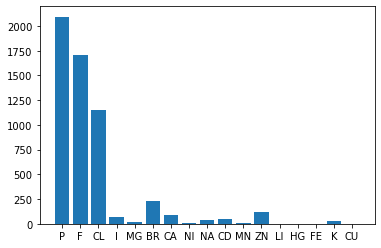

In [29]:
new_dict = {}
for i in ele_dict:
    if i!='C' and i!='N' and i!='O' and i!='H' and i!='S':
        new_dict[i] = ele_dict[i]
plt.bar([i for i in new_dict], [ele_dict[i] for i in new_dict])
plt.savefig('element_density.jpg', dpi=400)